<center>
    <h2 style="color:#61ff35;
    font-size:4pc;
    margin-right:30%;
    font-family: 'Courier New', Courier, monospace;
    font-weight: bold;
    ">XBOX</h2>
</center>


In [1]:
# bibliotecas
import pandas as pd
import ast

## importando os dados

In [ ]:
# dados sendo importados
achievements = pd.read_csv("/content/xbox/achievements.csv")
games = pd.read_csv("/content/xbox/games.csv")
history = pd.read_csv("/content/xbox/history.csv")
players = pd.read_csv("/content/xbox/players.csv")
prices = pd.read_csv("/content/xbox/prices.csv")
purchased_games = pd.read_csv("/content/xbox/purchased_games.csv")

In [ ]:
games['publishers'] = games['publishers'].fillna('[]')
games['publishers'] = games['publishers'].apply(ast.literal_eval)

games['genres'] = games['genres'].fillna('[]')
games['genres'] = games['genres'].apply(ast.literal_eval)

games['supported_languages'] = games['supported_languages'].fillna('[]')
games['supported_languages'] = games['supported_languages'].apply(ast.literal_eval)

games

,gameid,title,developers,publishers,genres,supported_languages,release_date
0,1253,Tomb Raider: Legend,[crystal dynamics],[Crystal Dynamics],"[Action, Adventure, strategy, Simulation]","[French, Spanish, German, Italian]",2009-08-11
1,749026,SANYA,[helpnode],[Samustai],"[Adventure, Point & Click]",[],2024-11-22
2,747223,Sky Roll!,[Entity3],[Entity3],[Platformer],[],2024-11-22
3,727440,Rogue Flight,[],[],[],[],2024-10-25
4,750229,Infernitos,[AFIL Games],[AFIL Games],[Puzzle],[],2024-12-18
...,...,...,...,...,...,...,...
10484,163747,Fishing Sim World,[Dovetail Games],[],[sports],"[French, Spanish, German, Russian, Chinese (si...",2018-09-18
10485,163627,Construction Simulator 2 US - Console Edition,[],[],[],"[Japanese, French, Spanish, German, Italian, D...",2018-09-12
10486,6817,Saraiva Player,[Saraiva Player],[Saraiva Player],[Video],[],2014-01-21
10487,6807,SKY ONLINE,[SKY Brasil],[SKY Brasil],[Video],[],2013-11-22


In [ ]:
publishers_exploded = games.explode('publishers')
genres_exploded = games.explode('genres')
supported_languages_exploded = games.explode('supported_languages')

In [ ]:
genres_count = genres_exploded['genres'].value_counts().sort_values(ascending=False)
genres_count

,count
genres,
Adventure,1987
Action,1575
Platformer,792
Indie,641
Simulation,608
...,...
Handball,1
Tools,1
Skiing,1


In [ ]:
supported_languages_count = supported_languages_exploded['supported_languages'].value_counts().sort_values(ascending=False)
supported_languages_count

,count
supported_languages,
German,3448
Spanish,3404
French,3376
Italian,3177
Japanese,1951
Russian,1483
Portuguese (Brazil),1006
Polish,966
Korean,881


In [ ]:
purchased_games['library'] = purchased_games['library'].fillna('[]')
purchased_games['library'] = purchased_games['library'].apply(ast.literal_eval)

purchased_games

,playerid,library
0,848738,"[14711, 2128, 10783, 9118, 7235, 9637, 717236,..."
1,848736,"[707376, 747223, 550303, 620354, 734202, 74678..."
2,1470783,"[638932, 32551, 748147, 468697, 446682, 615753..."
3,848735,"[736287, 555825, 717258, 422060, 12645, 550263..."
4,848739,"[698325, 443814, 745210, 747223, 734202, 71154..."
...,...,...
46461,698172,"[1225, 2937, 3597, 2114, 1142, 2152, 1186, 211..."
46462,606933,"[1240, 1529, 1209, 590826, 185285, 628210, 157..."
46463,776695,"[7756, 183346, 18204, 15414, 17177, 11501, 195..."
46464,3069400,"[755119, 12694, 550303, 19170, 176537, 648424,..."


In [ ]:
library_exploded = purchased_games.explode('library')
library_exploded = library_exploded.rename(columns={'library': 'gameid'})

In [ ]:
games_by_popularity = library_exploded['gameid'].value_counts().reset_index()
games_by_popularity = games_by_popularity.merge(games[['gameid', 'title']], on='gameid', how='left')
games_by_popularity = games_by_popularity[['title', 'count']]
games_by_popularity.head(10)

,title,count
0,Call of Duty Black Ops,26852
1,Halo 3,26806
2,Grand Theft Auto IV,26768
3,Call of Duty: Modern Warfare 2 (2009),26077
4,Grand Theft Auto V,24996
5,Fortnite,24899
6,Halo: Reach,24868
7,Gears of War,24797
8,Gears of War 2,24748
9,Hexic HD,24683


In [ ]:
genres_by_popularity = library_exploded['gameid'].value_counts().reset_index()
genres_by_popularity = genres_by_popularity.merge(genres_exploded[['gameid', 'genres']],on='gameid',how='left')
genres_by_popularity = genres_by_popularity.groupby('genres')['count'].sum().reset_index()
genres_by_popularity = genres_by_popularity.sort_values(by='count', ascending=False)
genres_by_popularity

,genres,count
5,Adventure,3932891
1,Action,3798488
109,shooter,1796242
111,sports,740083
81,Simulation,726381
...,...,...
19,Bull Sports,116
47,Health & Fitness,71
46,Handball,37
9,Australian Football,22


In [ ]:
import plotly.express as px

In [ ]:
genres_expanded = games[['release_year', 'genres']].explode('genres')
genres_expanded = genres_expanded.dropna(subset=['release_year', 'genres'])
treemap_data = genres_expanded.groupby(['release_year', 'genres']).size().reset_index(name='count')
fig = px.treemap(treemap_data,
                 path=['release_year', 'genres'],
                 values='count',
                 title='Hierarquia de Gêneros Mais Lançados por Ano (Xbox)',
                 color='count',
                 color_continuous_scale='Viridis')
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
prices

,gameid,usd,eur,gbp,jpy,rub,date_acquired
0,1253,19.99,19.99,15.99,NaN,1772.0,2025-02-22
1,727440,17.99,17.99,14.99,NaN,1595.0,2025-02-22
2,747995,4.79,4.79,3.99,NaN,425.0,2025-02-22
3,727135,17.99,17.99,14.99,NaN,1595.0,2025-02-22
4,748541,19.99,19.99,16.74,NaN,1772.0,2025-02-22
...,...,...,...,...,...,...,...
22633,717371,4.99,4.99,4.19,NaN,443.0,2025-02-24
22634,3813,NaN,NaN,NaN,NaN,NaN,2025-02-24
22635,3878,NaN,NaN,NaN,NaN,NaN,2025-02-24
22636,2059,59.99,69.99,54.99,NaN,6218.0,2025-02-24


In [ ]:
prices = prices.dropna(axis=1, how='all')
prices = prices.fillna(0)
prices

,gameid,usd,eur,gbp,rub,date_acquired
0,1253,19.99,19.99,15.99,1772.0,2025-02-22
1,727440,17.99,17.99,14.99,1595.0,2025-02-22
2,747995,4.79,4.79,3.99,425.0,2025-02-22
3,727135,17.99,17.99,14.99,1595.0,2025-02-22
4,748541,19.99,19.99,16.74,1772.0,2025-02-22
...,...,...,...,...,...,...
22633,717371,4.99,4.99,4.19,443.0,2025-02-24
22634,3813,0.00,0.00,0.00,0.0,2025-02-24
22635,3878,0.00,0.00,0.00,0.0,2025-02-24
22636,2059,59.99,69.99,54.99,6218.0,2025-02-24


In [ ]:
conversion_rates = {
    'usd': 1,
    'eur': 1.13,
    'gbp': 1.33,
    'rub': 0.012
}

def convert_to_usd(row, conversion_rates):
    for currency, rate in conversion_rates.items():
        if row[currency] is not None:
            row[currency + '_usd'] = row[currency] * rate
    return row

prices_usd = prices.apply(convert_to_usd, axis=1, conversion_rates=conversion_rates)

In [ ]:
prices_usd = prices_usd[['gameid', 'usd_usd', 'eur_usd', 'gbp_usd', 'rub_usd', 'date_acquired']]
prices_usd = prices_usd.rename(columns={'usd_usd': 'usd', 'eur_usd': 'eur', 'gbp_usd': 'gbp', 'rub_usd': 'rub'})
prices_usd

,gameid,usd,eur,gbp,rub,date_acquired
0,1253,19.99,22.5887,21.2667,21.264,2025-02-22
1,727440,17.99,20.3287,19.9367,19.140,2025-02-22
2,747995,4.79,5.4127,5.3067,5.100,2025-02-22
3,727135,17.99,20.3287,19.9367,19.140,2025-02-22
4,748541,19.99,22.5887,22.2642,21.264,2025-02-22
...,...,...,...,...,...,...
22633,717371,4.99,5.6387,5.5727,5.316,2025-02-24
22634,3813,0.00,0.0000,0.0000,0.000,2025-02-24
22635,3878,0.00,0.0000,0.0000,0.000,2025-02-24
22636,2059,59.99,79.0887,73.1367,74.616,2025-02-24


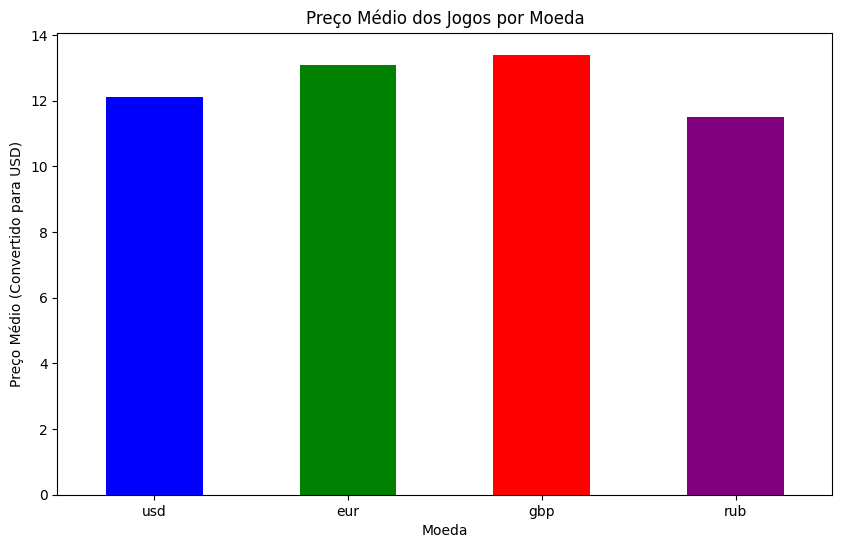

In [ ]:
import matplotlib.pyplot as plt

average_prices = prices_usd[['usd', 'eur', 'gbp', 'rub']].mean()
average_prices.plot(kind='bar', color=['blue', 'green', 'red', 'purple'], figsize=(10, 6))

plt.title('Preço Médio dos Jogos por Moeda')
plt.xlabel('Moeda')
plt.ylabel('Preço Médio (Convertido para USD)')
plt.xticks(rotation=0)
plt.show()

In [ ]:
library_with_prices = library_exploded.merge(prices_usd[['gameid', 'usd']], on='gameid', how='left')

In [ ]:
average_spending_per_player = library_with_prices.groupby('playerid')['usd'].mean().reset_index()
average_spending_per_player = average_spending_per_player.rename(columns={'usd': 'avg_spending_usd'})

In [ ]:
average_spending_per_player

,playerid,avg_spending_usd
0,458764,11.000489
1,458950,9.054716
2,459006,7.343641
3,459436,16.364947
4,459656,6.556422
...,...,...
46461,4745711,17.676088
46462,4745746,7.496250
46463,4745980,14.523143
46464,4746448,21.955935


In [ ]:
average_spending_per_player['avg_spending_usd'].mean()

np.float64(13.565826005981076)

In [ ]:
popularity = library_exploded['gameid'].value_counts().reset_index()
popularity = popularity.merge(publishers_exploded[['gameid', 'publishers']], on='gameid', how='left')

In [ ]:
publishers_by_sales = popularity.groupby('publishers')['count'].sum().reset_index()
publishers_by_sales = publishers_by_sales.sort_values(by='count', ascending=False).reset_index()
publishers_by_sales.head(10)

,index,publishers,count
0,1183,Microsoft Studios,1324883
1,590,Electronic Arts,1100950
2,1982,Ubisoft,686202
3,70,Activision,500128
4,204,Bethesda Softworks,305455
5,2116,Xbox Game Studios,303456
6,1623,SEGA,276093
7,19,2K Games,255549
8,1752,Square Enix,202021
9,1596,Rockstar Games,182596


In [ ]:
publishers_prices = publishers_exploded.merge(prices, on='gameid', how='left')
publishers_prices = publishers_prices[['publishers', 'usd']].groupby('publishers').mean()
publishers_prices = publishers_prices.sort_values(by='usd', ascending=False).reset_index()
publishers_prices.head(10)

,publishers,usd
0,KRAFTON,69.99
1,Hello Games,59.99
2,Snapshot Games,59.99
3,Relic Entertainment,59.99
4,Giants Software,49.99
5,DELiGHTWORKS,49.99
6,Owlcat Games,49.99
7,Bokeh Game Studio,49.99
8,Amplitude Studios,49.99
9,Bungarra Software,49.99


In [ ]:
publishers_by_sales['rank_sales'] = publishers_by_sales['count'].rank(ascending=False, method='dense').astype(int)
publishers_prices['rank_price'] = publishers_prices['usd'].rank(ascending=False, method='dense').astype(int)

publisher_sales_vs_prices = publishers_by_sales.merge(publishers_prices, on='publishers', how='left')
publisher_sales_vs_prices = publisher_sales_vs_prices[['publishers','rank_sales','rank_price']]

In [ ]:
publisher_sales_vs_prices.head(10)

,publishers,rank_sales,rank_price
0,Microsoft Studios,1,411
1,Electronic Arts,2,317
2,Ubisoft,3,295
3,Activision,4,422
4,Bethesda Softworks,5,143
5,Xbox Game Studios,6,413
6,SEGA,7,227
7,2K Games,8,252
8,Square Enix,9,73
9,Rockstar Games,10,57


In [ ]:
publisher_sales_vs_prices.tail(10)

,publishers,rank_sales,rank_price
2242,Jolly Lobster Interactive,1227,429
2243,Agate,1228,68
2244,Notte Studio Games,1228,323
2245,Hoplite Research,1228,37
2246,Aoca Game Lab,1228,344
2247,Markt+Technik,1228,131
2248,R-Next,1228,377
2249,Jyamma Games,1228,16
2250,Goblinz Publishing,1228,68
2251,Microids Life,1228,483


In [ ]:
prices['date_acquired'] = pd.to_datetime(prices['date_acquired'])
prices_sorted = prices.sort_values('date_acquired', ascending=False)
latest_prices = prices_sorted.drop_duplicates(subset='gameid', keep='first')
games_by_price = games.merge(latest_prices, on='gameid', how='left')
games_by_price

,gameid,title,developers,publishers,genres,supported_languages,release_date,release_year,usd,eur,gbp,rub,date_acquired
0,1253,Tomb Raider: Legend,[crystal dynamics],[Crystal Dynamics],"[Action, Adventure, strategy, Simulation]","[French, Spanish, German, Italian]",2009-08-11,2009,19.99,19.99,15.99,1776.0,2025-02-24
1,749026,SANYA,[helpnode],[Samustai],"[Adventure, Point & Click]",[],2024-11-22,2024,14.99,14.99,12.49,1332.0,2025-02-24
2,747223,Sky Roll!,[Entity3],[Entity3],[Platformer],[],2024-11-22,2024,0.99,0.99,0.79,88.0,2025-02-24
3,727440,Rogue Flight,[],[],[],[],2024-10-25,2024,17.99,17.99,14.99,1598.0,2025-02-24
4,750229,Infernitos,[AFIL Games],[AFIL Games],[Puzzle],[],2024-12-18,2024,3.49,3.49,2.93,0.0,2025-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10484,163747,Fishing Sim World,[Dovetail Games],[],[sports],"[French, Spanish, German, Russian, Chinese (si...",2018-09-18,2018,0.00,0.00,0.00,0.0,2025-02-24
10485,163627,Construction Simulator 2 US - Console Edition,[],[],[],"[Japanese, French, Spanish, German, Italian, D...",2018-09-12,2018,14.99,0.00,11.99,1332.0,2025-02-24
10486,6817,Saraiva Player,[Saraiva Player],[Saraiva Player],[Video],[],2014-01-21,2014,0.00,0.00,0.00,0.0,2025-02-24
10487,6807,SKY ONLINE,[SKY Brasil],[SKY Brasil],[Video],[],2013-11-22,2013,0.00,0.00,0.00,0.0,2025-02-24


In [ ]:
games_by_price = games_by_price[['title', 'usd']]
games_by_price = games_by_price.sort_values(by='usd', ascending=False).reset_index()
games_by_price.head(10)

,index,title,usd
0,0,S.T.A.L.K.E.R. 2: Heart of Chornobyl,109.99
1,18,Atomic Heart,69.99
2,16,The Quarry,69.99
3,41,NHL 24,69.99
4,29,Madden NFL 22,69.99
5,40,The Quarry,69.99
6,25,Dead Space,69.99
7,28,Indiana Jones and the Great Circle,69.99
8,26,Madden NFL 20,69.99
9,27,Dragon's Dogma 2,69.99


In [ ]:
games_by_popularity['rank_popularity'] = games_by_popularity['count'].rank(ascending=False, method='dense').astype(int)
games_by_price['rank_price'] = games_by_price['usd'].rank(ascending=False, method='dense').astype(int)

games_popularity_vs_prices = games_by_popularity.merge(games_by_price, on='title', how='left')
games_popularity_vs_prices = games_popularity_vs_prices[['title','rank_popularity','rank_price']]

games_popularity_vs_prices = games_popularity_vs_prices.dropna(subset=['title'])
games_popularity_vs_prices = games_popularity_vs_prices.drop_duplicates(subset='title')

In [ ]:
games_popularity_vs_prices.head(10)

,title,rank_popularity,rank_price
0,Call of Duty Black Ops,1,10.0
1,Halo 3,2,124.0
2,Grand Theft Auto IV,3,34.0
4,Call of Duty: Modern Warfare 2 (2009),4,124.0
6,Grand Theft Auto V,5,10.0
10,Fortnite,6,124.0
11,Halo: Reach,7,58.0
12,Gears of War,8,54.0
13,Gears of War 2,9,54.0
15,Hexic HD,10,124.0


In [ ]:
games_popularity_vs_prices.tail(10)

,title,rank_popularity,rank_price
13374,The Strange Story Of Brian Fisher: Chapter 2,3024,46.0
13375,Nefiriya and the Sands of Eternity,3024,86.0
13376,Rumours From Elsewhere,3024,58.0
13377,Enotria: The Last Song,3024,13.0
13378,DETECTIVE - The Motel,3024,52.0
13379,The Coma 2B: Catacomb,3024,46.0
13380,Glitch Hero,3024,54.0
13381,ARIDA: Backland's Awakening,3024,68.0
13385,Frozen Gauntlet (Windows),3024,86.0
13388,Turmoil,3024,44.0


In [ ]:
games_popularity_vs_prices.sort_values(by='rank_price').head(10)

,title,rank_popularity,rank_price
1301,S.T.A.L.K.E.R. 2: Heart of Chornobyl,923,1.0
4376,Like a Dragon: Infinite Wealth,2410,2.0
1009,Madden NFL 20,716,2.0
1647,Persona 3 Reload,1158,2.0
1825,Madden NFL 23,1271,2.0
2206,EA SPORTS PGA TOUR,1504,2.0
1820,Madden NFL 22,1267,2.0
3142,Dragon's Dogma 2,2003,2.0
1708,"Warhammer 40,000: Space Marine",1196,2.0
454,Atomic Heart,315,2.0


In [ ]:
games_popularity_vs_prices.sort_values(by='rank_price').tail(10)

,title,rank_popularity,rank_price
8576,Chroma Squad,2876,124.0
8577,Just Dance Kids 2,2876,124.0
8587,Trine 3: The Artifacts of Power,2877,124.0
8588,Kinect Sports Gems: Ski Race,2877,124.0
8527,FRU,2874,124.0
8530,Dance Paradise,2874,124.0
8549,Rugby League Live,2875,124.0
4,Call of Duty: Modern Warfare 2 (2009),4,124.0
1,Halo 3,2,124.0
13367,My Universe - Fashion Boutique,3024,124.0
